In [1]:
from bs4 import BeautifulSoup, SoupStrainer
import requests
import urllib.request
import copy
import pandas as pd
from newspaper import Article
import re
import nltk
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import string
import pandas as pd
import re 
path_fake='fake/'
path_real='real/'

In [2]:
news=pd.read_csv(path_fake+'news.csv')
test_dataset=pd.DataFrame()
for i in range(0, len(news)):
    if news['label'].iloc[i]==1 and len(test_dataset)<800:
        test_dataset=pd.concat([test_dataset,pd.DataFrame({'News':[news['text'].iloc[i]], 'InfSec':[0],'FAKE?':[1],'Link':['www.fake.ru']})]).reset_index(drop=True)
test_dataset

,News,InfSec,FAKE?,Link
0,Помощник депутата Палаты представителей: мы да...,0,1,www.fake.ru
1,Почему правда может привести к увольнению 29 о...,0,1,www.fake.ru
2,"Выявлено 15 мирных жителей, погибших в результ...",0,1,www.fake.ru
3,Распечатать\nИранская женщина была приговорена...,0,1,www.fake.ru
4,"Тайна, окружающая Третий рейх и нацистскую Гер...",0,1,www.fake.ru
...,...,...,...,...
795,Это заварилось хорошо и хорошо,0,1,www.fake.ru
796,Поскольку до дня выборов осталось всего четыре...,0,1,www.fake.ru
797,"Нет, преступления на почве ненависти НЕ «усили...",0,1,www.fake.ru
798,Форма поиска Поиск От плохого к худшему: выкуп...,0,1,www.fake.ru


In [3]:
result_data1frame=pd.read_csv(path_real+'dataset1_news.csv')
result_data2frame=pd.read_csv(path_real+'dataset2_news.csv')
result_data3frame=pd.read_csv(path_real+'dataset3_news.csv')
result_data4frame=pd.read_csv(path_real+'dataset4_news.csv')
test_dataset=pd.concat([test_dataset,result_data1frame.head(100)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data1frame.tail(100)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data2frame.head(100)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data2frame.tail(100)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data3frame.head(100)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data3frame.tail(100)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data4frame.head(100)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data4frame.tail(100)]).reset_index(drop=True)
print(len(test_dataset))
test_dataset.sample(frac=1).reset_index(drop=True)
for i in range(0, len(test_dataset['News'])):
    u=test_dataset['News'].iloc[i]
    u=u.replace('Alexander Antipov', '')
    u=u.replace('alexander antipov', '')
    test_dataset.loc[i,'News']=copy.deepcopy(u)
test_dataset.sample(frac=1).reset_index(drop=True)
test_dataset.to_csv('corrrect_dataset.csv', encoding='utf-8', index=False)

1600


<AxesSubplot:>

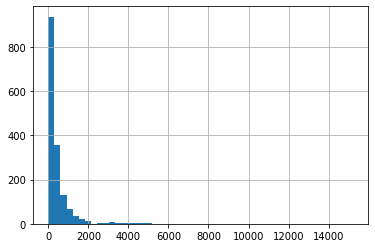

In [4]:
text = pd.read_csv('corrrect_dataset.csv')['News'].astype('str')
seq_len1 = [len(str(i).split()) for i in text]
pd.Series(seq_len1).hist(bins = 50)